## Evaluation of the datasets with CICFlowmeter

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir=root_dir+'proyecto_grado_redes/evaluation_datasets/'

Mounted at /content/gdrive


In [2]:
import pandas as pd

## Reading the dataset

In [3]:
df_ctu_normal1_org=pd.read_csv(base_dir+"csv_original/2017-05-01_normal_CTU_30_pcap_Flow.csv")
df_ctu_normal1_org['Label'] = df_ctu_normal1_org['Label'].map({'NeedManualLabel': 'Normal'})

In [4]:
df_ctu_normal2_org=pd.read_csv(base_dir+"csv_original/2017-05-02_kali-normal_CTU_22_pcap_Flow.csv")
df_ctu_normal2_org['Label'] = df_ctu_normal2_org['Label'].map({'NeedManualLabel': 'Normal'})

In [5]:
df_ctu_normal3_org=pd.read_csv(base_dir+"csv_original/2017-05-02_normal_CTU_32_pcap_Flow.csv")
df_ctu_normal3_org['Label'] = df_ctu_normal3_org['Label'].map({'NeedManualLabel': 'Normal'})

In [6]:
df_ctu_attack1_org=pd.read_csv(base_dir+"csv_original/2017-04-12_win5_CTU_243_pcap_Flow.csv")
df_ctu_attack1_org['Label'] = df_ctu_attack1_org['Label'].map({'NeedManualLabel': 'Attack'})

In [7]:
df_ctu_attack2_org=pd.read_csv(base_dir+"csv_original/2017-05-15_win15_CTU_261_pcap_Flow.csv")
df_ctu_attack2_org['Label'] = df_ctu_attack2_org['Label'].map({'NeedManualLabel': 'Attack'})

In [8]:
df_ctu_attack3_org=pd.read_csv(base_dir+"csv_original/2017-05-15_win16_CTU_262_pcap_Flow.csv")
df_ctu_attack3_org['Label'] = df_ctu_attack3_org['Label'].map({'NeedManualLabel': 'Attack'})

In [9]:
df_ctu_normal1_srg=pd.read_csv(base_dir+"csv_modified/2017-05-01_normal_CTU_30_pcap_Flow.csv")
df_ctu_normal1_srg['Label'] = df_ctu_normal1_srg['Label'].map({'ManualLabel': 'Normal'})

In [10]:
df_ctu_normal2_srg=pd.read_csv(base_dir+"csv_modified/2017-05-02_kali-normal_CTU_22_pcap_Flow.csv")
df_ctu_normal2_srg['Label'] = df_ctu_normal2_srg['Label'].map({'ManualLabel': 'Normal'})

In [11]:
df_ctu_normal3_srg=pd.read_csv(base_dir+"csv_modified/2017-05-02_normal_CTU_32_pcap_Flow.csv")
df_ctu_normal3_srg['Label'] = df_ctu_normal3_srg['Label'].map({'ManualLabel': 'Normal'})

In [12]:
df_ctu_attack1_srg=pd.read_csv(base_dir+"csv_modified/2017-04-12_win5_CTU_243_pcap_Flow.csv")
df_ctu_attack1_srg['Label'] = df_ctu_attack1_srg['Label'].map({'ManualLabel': 'Attack'})

In [13]:
df_ctu_attack2_srg=pd.read_csv(base_dir+"csv_modified/2017-05-15_win15_CTU_261_pcap_Flow.csv")
df_ctu_attack2_srg['Label'] = df_ctu_attack2_srg['Label'].map({'ManualLabel': 'Attack'})

In [14]:
df_ctu_attack3_srg=pd.read_csv(base_dir+"csv_modified/2017-05-15_win16_CTU_262_pcap_Flow.csv")
df_ctu_attack3_srg['Label'] = df_ctu_attack3_srg['Label'].map({'ManualLabel': 'Attack'})

## ML

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [16]:
def get_score (model,x_test, y_test):
    score = model.score(x_test, y_test)
    print (f'{model}\nscore: {score}')

In [17]:
def evaluate_model (model,x_test,y_test):
    y_predicted = model.predict(x_test)
    cm = confusion_matrix(y_test, y_predicted)    
    print(classification_report(y_test,y_predicted))
    get_accuracy(cm)
    plt.figure(figsize=(18,12))
    sn.heatmap(cm, annot=True)
    plt.xlabel('Predicted', fontsize=24)
    plt.ylabel('Truth',fontsize=24)

In [18]:
def get_accuracy(cm):
    tn=cm[0][0]
    tp=cm[1][1]
    fn=cm[0][1]
    fp=cm[1][0]
    fpr=fp/(fp+tn)
    fnr=fn/(fn+tp)
    far=(fpr+fnr)/2
    acc=(tp+tn)/(tp+tn+fp+fn)
    print(f'False positive rate FPR: {fpr}\nFalse negative rate FNR: {fnr}\nFAR: {far}\nAccuracy: {acc}')

## Original Evaluation

In [19]:
df_org=pd.concat([df_ctu_normal1_org,df_ctu_normal2_org,df_ctu_normal3_org,df_ctu_attack1_org,df_ctu_attack2_org,df_ctu_attack3_org],axis='index')
df_org = df_org.reset_index()

In [20]:
df_org=df_org.sample(frac=1).reset_index(drop=True)
#df_org = shuffle(df_org)
df_org.drop(columns=['index','Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp'],inplace=True)
traffic={'Normal':0,'Attack':1}
df_org.replace({'Label':traffic},inplace=True)

In [21]:
df_org.replace([np.inf, -np.inf], np.nan, inplace=True)
df_org=df_org.apply(lambda x: x.fillna(x.mean()),axis=0)

In [22]:
input = df_org.drop(columns=['Label'])
target = df_org['Label']

x_train, x_test, y_train, y_test = train_test_split(input ,target, train_size=0.7 ,random_state=2)

#### Random Forest Classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
score: 0.9995447585150851
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76464
           1       1.00      1.00      1.00    116840

    accuracy                           1.00    193304
   macro avg       1.00      1.00      1.00    193304
weighted avg       1.00      1.00      1.00    193304

False positive rate FPR: 0.0005101106547728046
False negative rate FNR: 0.00041934103551561833
FAR: 

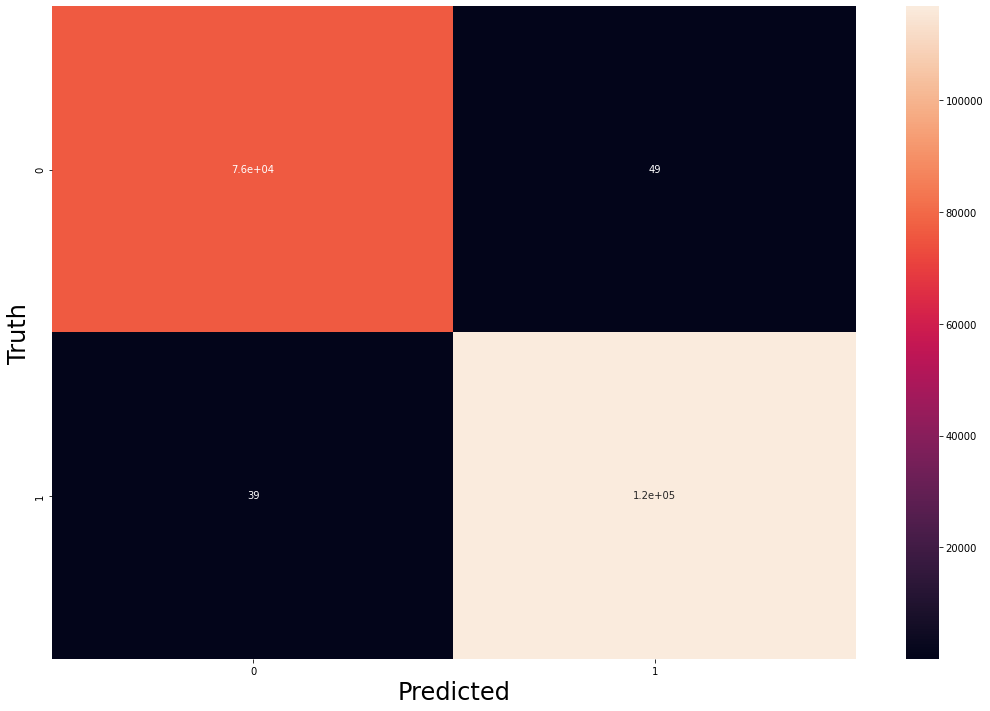

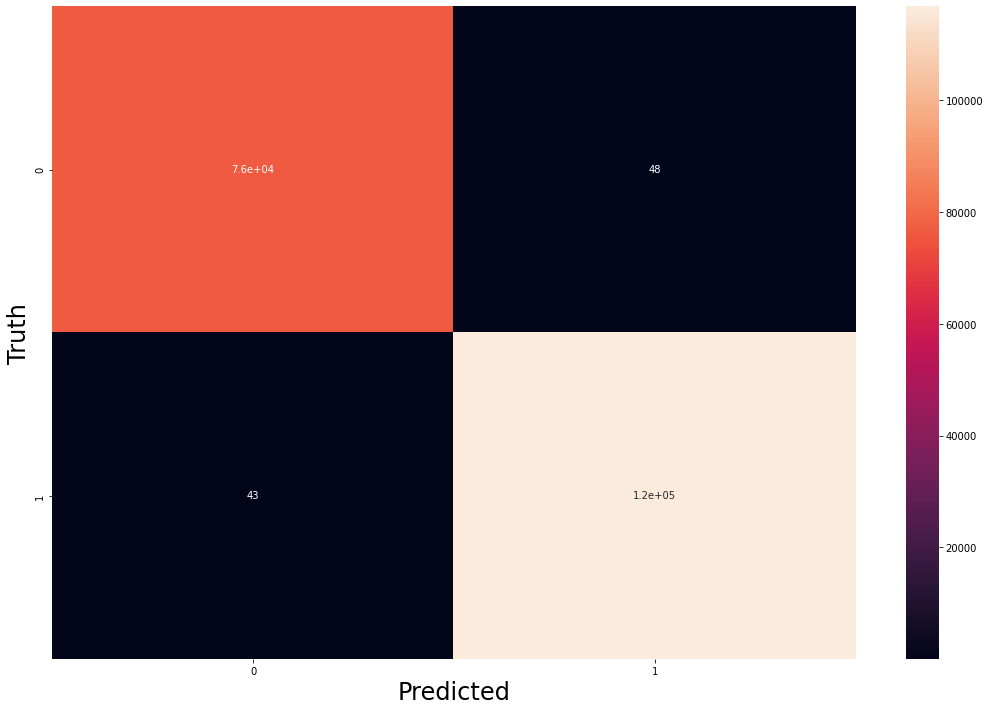

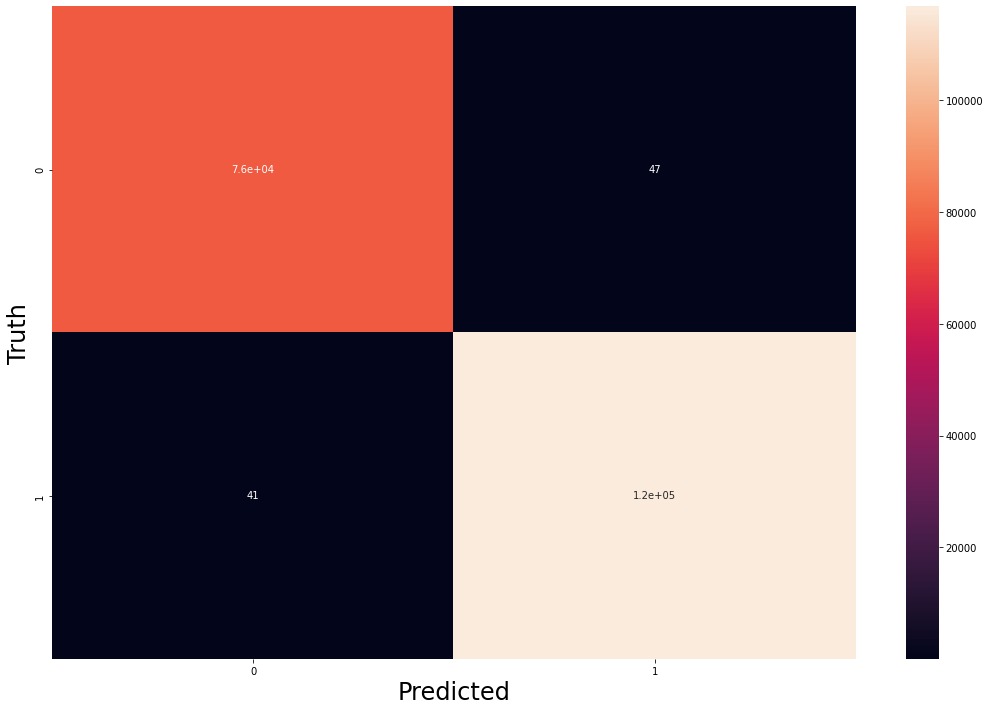

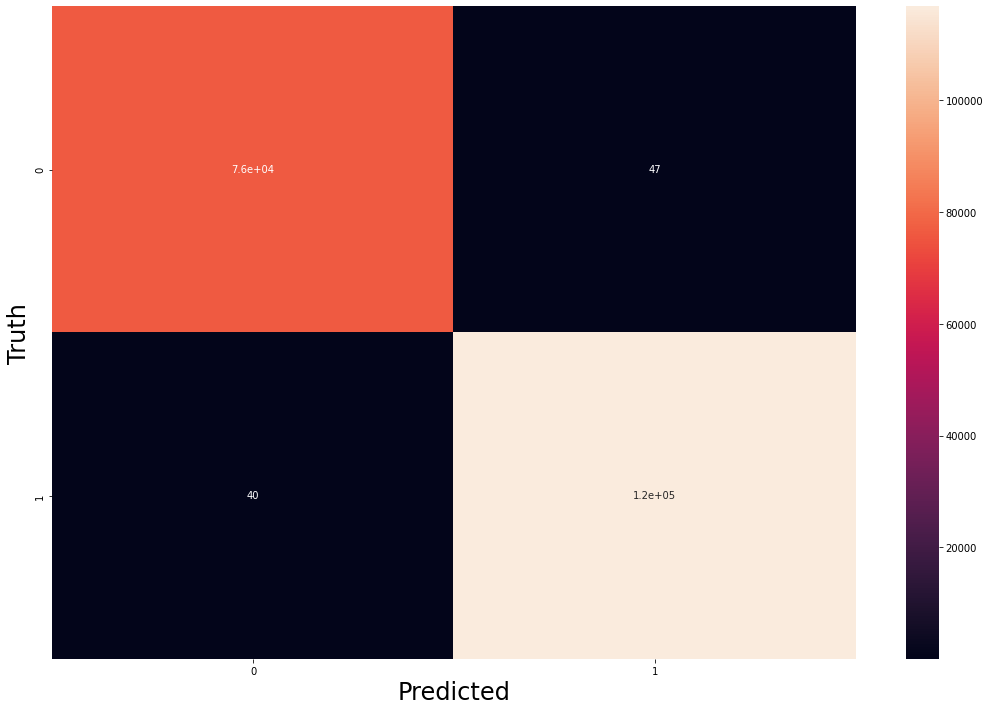

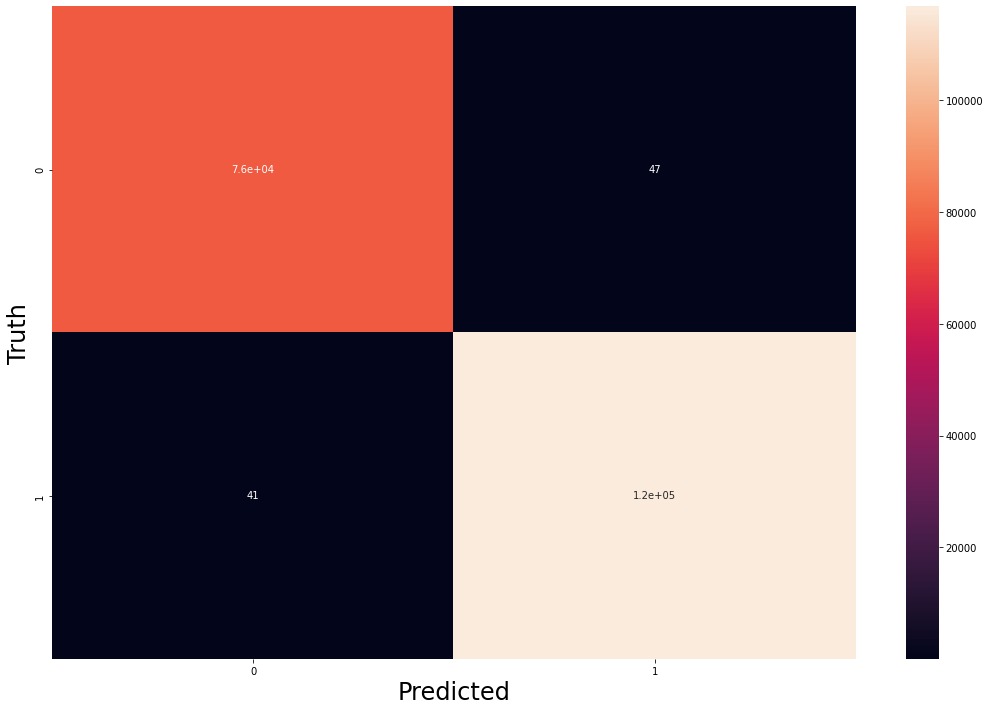

In [ ]:
n=[100,200,300,400,500]
for it in range(len(n)):
    rt_model = RandomForestClassifier(n_estimators=n[it])
    rt_model.fit(x_train,y_train)
    get_score(rt_model,x_test,y_test)
    evaluate_model(rt_model,x_test,y_test)

#### SVM

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [ ]:
"""import pickle

filename = 'svm_model.sav'
pickle.dump(svm_model, open(filename,'wb'))"""

In [ ]:
"""import pickle

svm2_model = pickle.load(open(filename,'rb'))"""

              precision    recall  f1-score   support

           0       0.64      0.97      0.77     76406
           1       0.97      0.64      0.77    116898

    accuracy                           0.77    193304
   macro avg       0.80      0.81      0.77    193304
weighted avg       0.84      0.77      0.77    193304

False positive rate FPR: 0.3618692458078907
False negative rate FNR: 0.029950902283885843
FAR: 0.19591007404588828
Accuracy: 0.7706772751727848


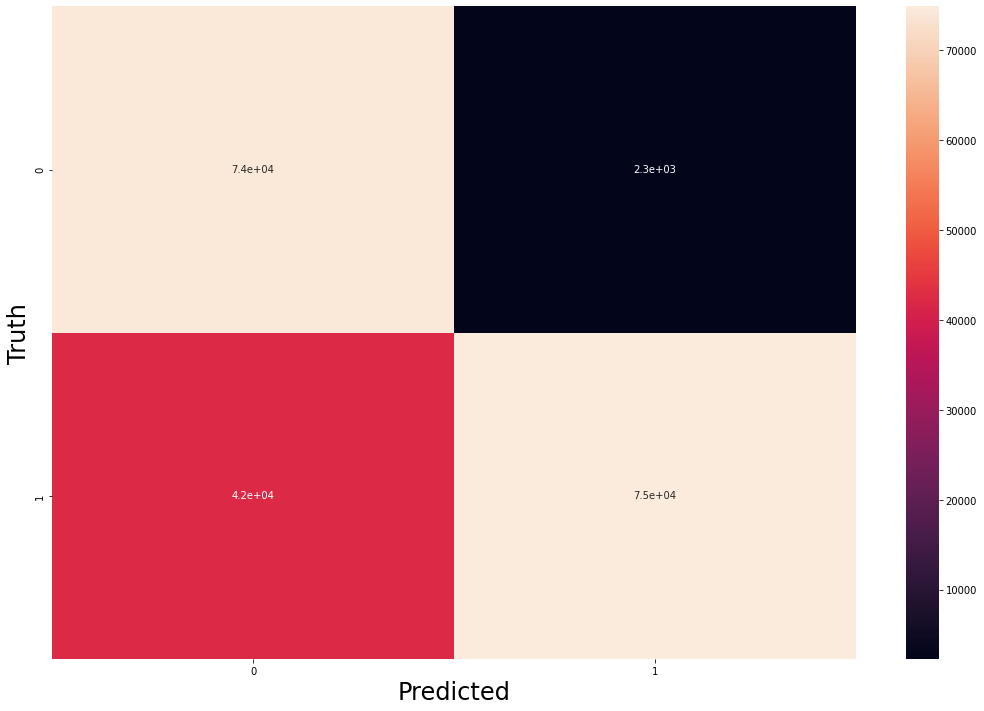

In [ ]:
#get_score(svm_model,x_test,y_test)
evaluate_model(svm_model,x_test,y_test)

#### AdaBoost 

AdaBoostClassifier(n_estimators=500)
score: 0.9991464222157844
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76330
           1       1.00      1.00      1.00    116974

    accuracy                           1.00    193304
   macro avg       1.00      1.00      1.00    193304
weighted avg       1.00      1.00      1.00    193304

False positive rate FPR: 0.001061223420283779
False negative rate FNR: 0.0007180898809167614
FAR: 0.0008896566506002702
Accuracy: 0.9991464222157844


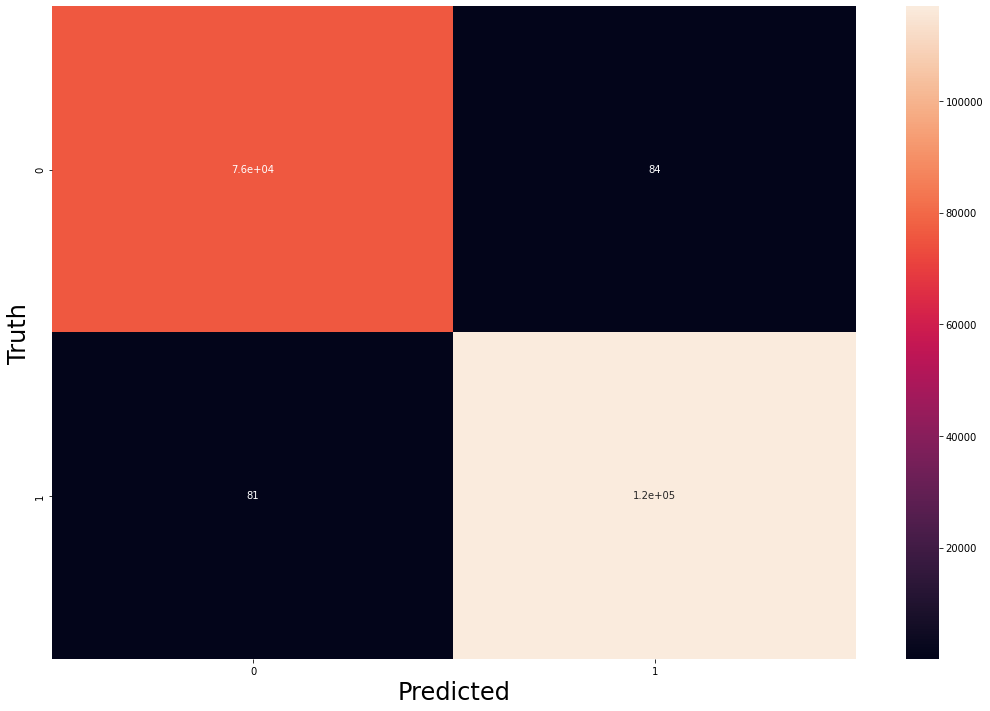

In [23]:
ab_model = AdaBoostClassifier(n_estimators=500)
ab_model.fit(x_train,y_train)
get_score(ab_model,x_test,y_test)
evaluate_model(ab_model,x_test,y_test)

#### Linear Discriminant

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
score: 0.9647912097007821
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     76464
           1       0.95      1.00      0.97    116840

    accuracy                           0.96    193304
   macro avg       0.97      0.96      0.96    193304
weighted avg       0.97      0.96      0.96    193304

False positive rate FPR: 0.004284087674352405
False negative rate FNR: 0.05286726699392087
FAR: 0.02857567733413664
Accuracy: 0.9647912097007821


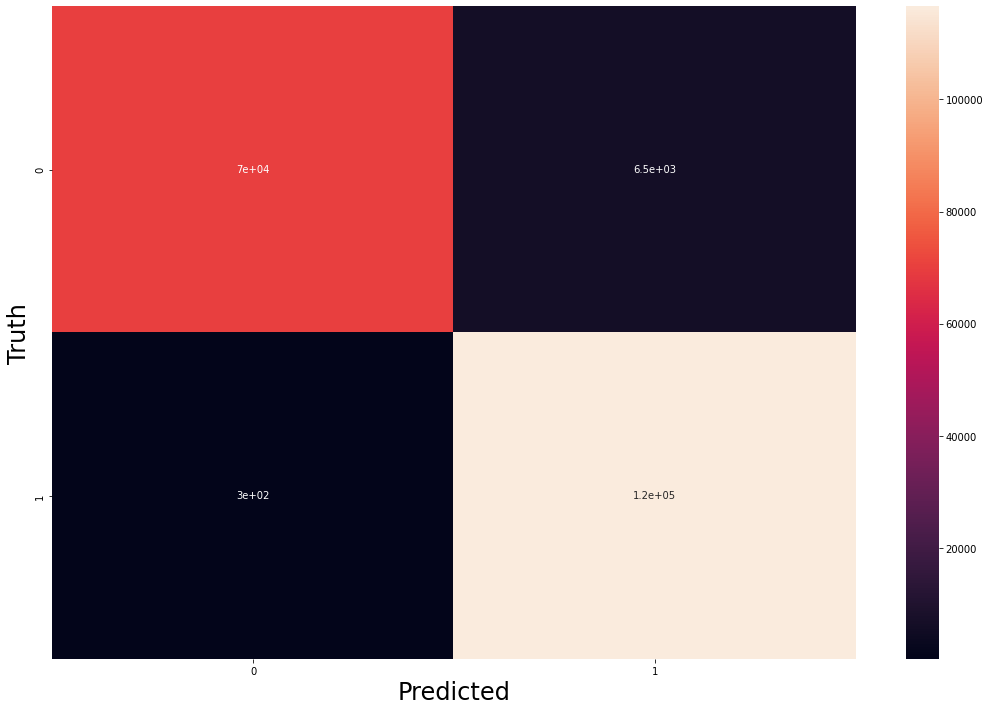

In [ ]:
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(x_train,y_train)
get_score(ld_model,x_test,y_test)
evaluate_model(ld_model,x_test,y_test)

#### KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
score: 0.9950130364607044
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     76464
           1       1.00      1.00      1.00    116840

    accuracy                           1.00    193304
   macro avg       1.00      0.99      0.99    193304
weighted avg       1.00      1.00      1.00    193304

False positive rate FPR: 0.005021897044554585
False negative rate FNR: 0.004964199661648353
FAR: 0.004993048353101469
Accuracy: 0.9950130364607044
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
score: 0.9943922526176385
              precision    recall  f1-score   support

           0       0.99      0.99      0.99  

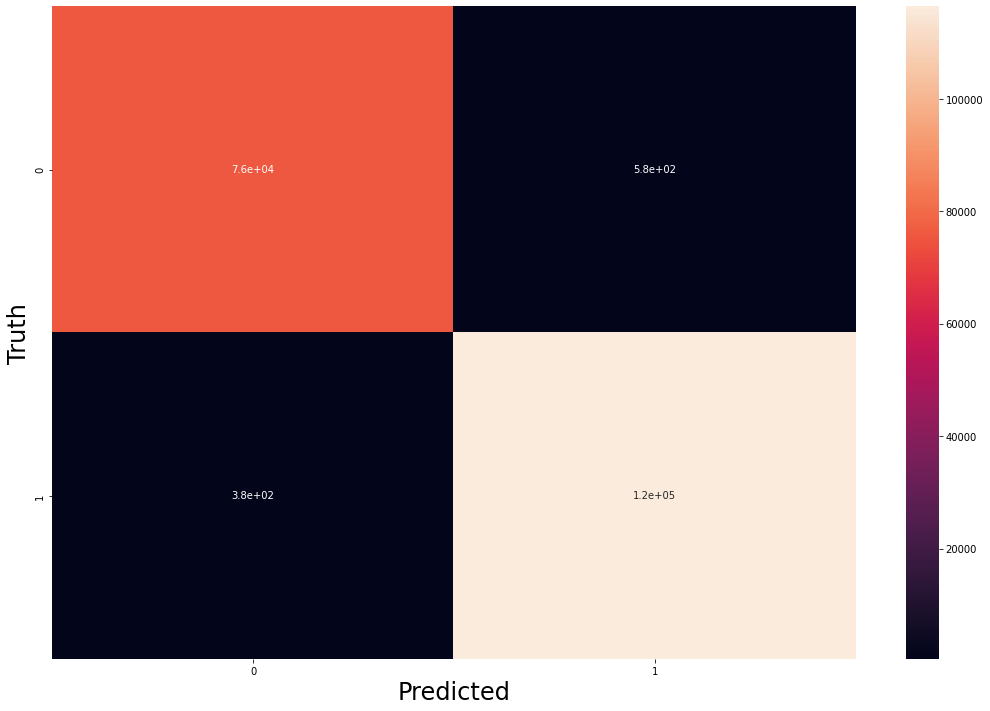

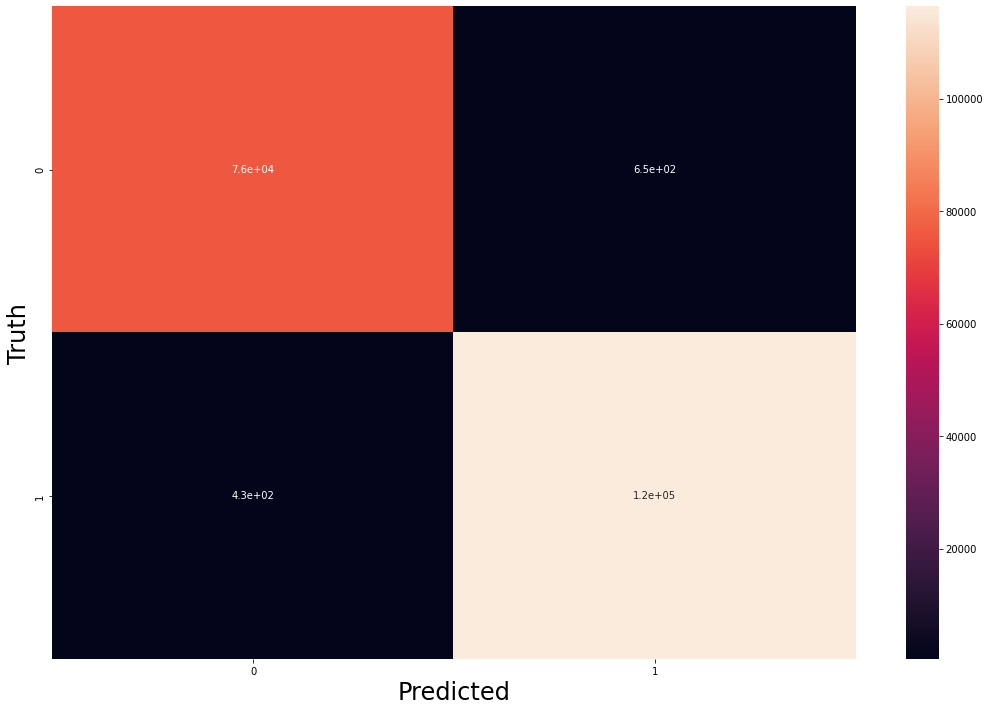

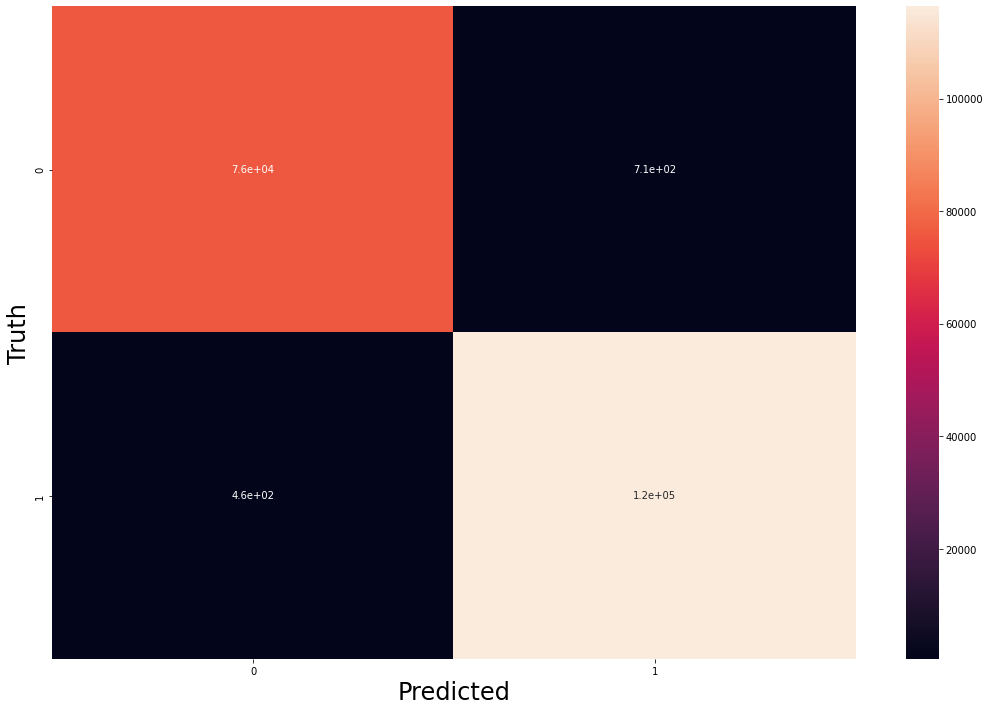

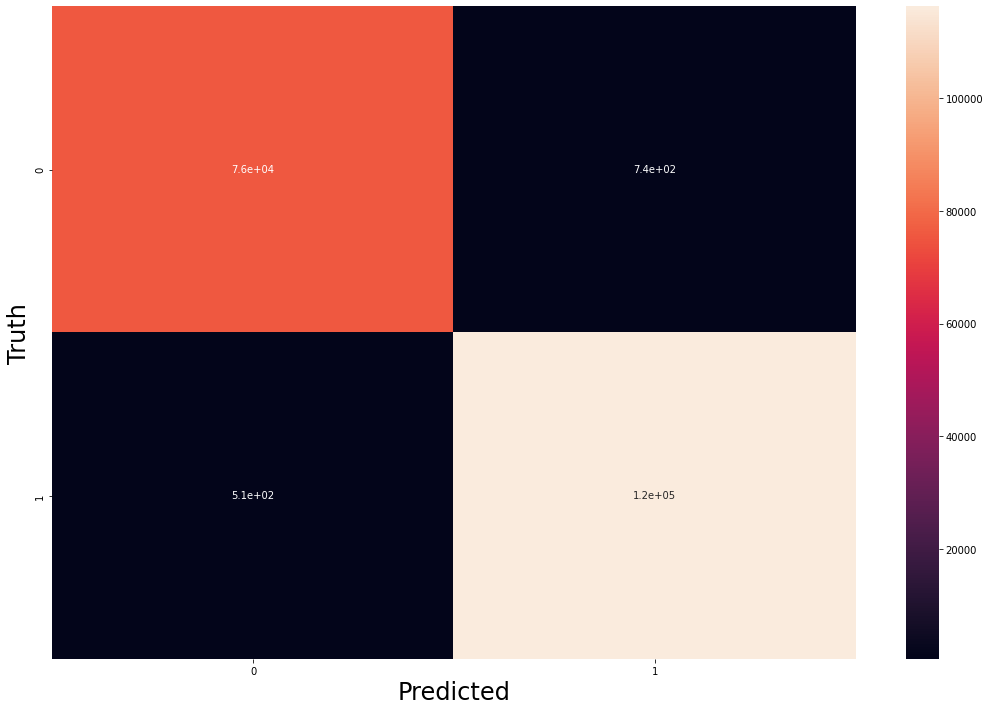

In [ ]:
n=[3,5,7,9]
for i in range(len(n)):  
  KNN_model = KNeighborsClassifier(n_neighbors=n[i])
  KNN_model.fit(x_train, y_train)
  get_score(KNN_model,x_test,y_test)
  evaluate_model(KNN_model,x_test,y_test)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score: 0.9617286760749907
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     76464
           1       0.96      0.98      0.97    116840

    accuracy                           0.96    193304
   macro avg       0.96      0.96      0.96    193304
weighted avg       0.96      0.96      0.96    193304

False positive rate FPR: 0.028366566511881998
False negative rate FNR: 0.04431064921221811
FAR: 0.03633860786205005
Accuracy: 0.9617286760749907


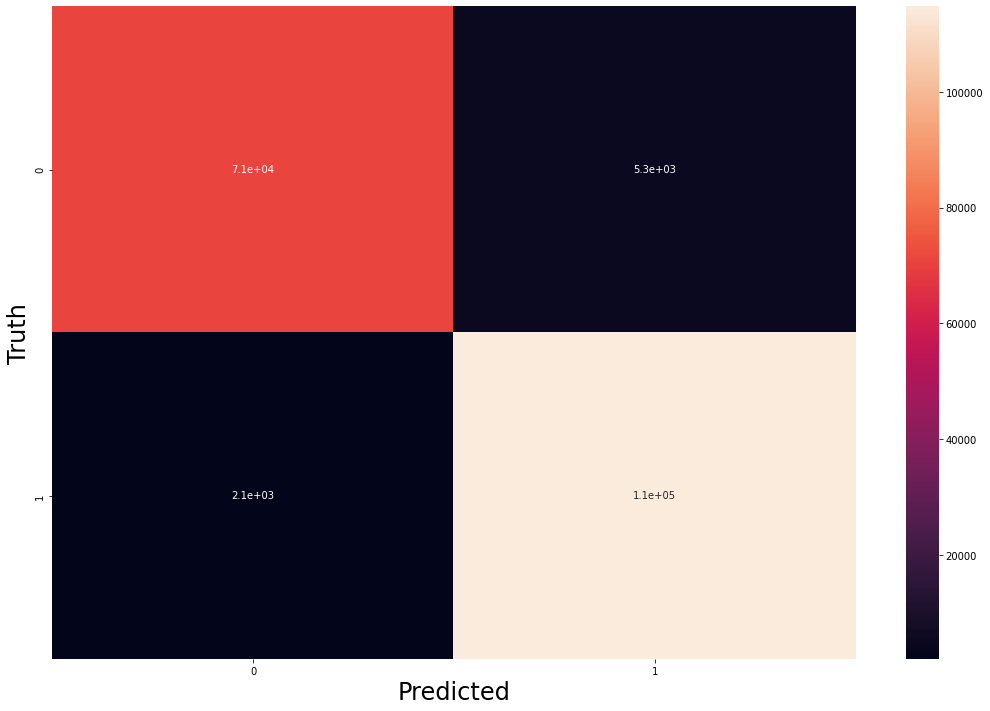

In [ ]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(x_train,y_train)
get_score(lr_model,x_test,y_test)
evaluate_model(lr_model,x_test,y_test)

#### Cross Validation

In [ ]:
model = RandomForestClassifier(n_estimators=400)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9996 (+/- 0.00)
[0.99949561 0.99960425 0.99961977 0.99970513 0.99955769]


In [ ]:
model = RandomForestClassifier(n_estimators=500)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9996 (+/- 0.00)
[0.99948785 0.99959649 0.99961977 0.99972065 0.99958097]


## Modified Evaluation

In [24]:
df_srg=pd.concat([df_ctu_normal1_srg,df_ctu_normal2_srg,df_ctu_normal3_srg,df_ctu_attack1_srg,df_ctu_attack2_srg,df_ctu_attack3_srg],axis='index')
df_srg = df_srg.reset_index()

In [25]:
df_srg=df_srg.sample(frac=1).reset_index(drop=True)
#df_srg = shuffle(df_srg)
df_srg.drop(columns=['index','Flow ID','Src IP','Src Port','Dst IP','Dst Port','Timestamp'],inplace=True)
traffic={'Normal':0,'Attack':1}
df_srg.replace({'Label':traffic},inplace=True)

In [26]:
df_srg.replace([np.inf, -np.inf], np.nan, inplace=True)
df_srg=df_srg.apply(lambda x: x.fillna(x.mean()),axis=0)

In [27]:
input = df_srg.drop(columns=['Label'])
target = df_srg['Label']

x_train, x_test, y_train, y_test = train_test_split(input ,target, train_size=0.7 ,random_state=2)

#### Random Forest Classifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
score: 0.9995292389190084
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76316
           1       1.00      1.00      1.00    116988

    accuracy                           1.00    193304
   macro avg       1.00      1.00      1.00    193304
weighted avg       1.00      1.00      1.00    193304

False positive rate FPR: 0.0006943443686051538
False negative rate FNR: 0.0003248612927769656
FAR: 0

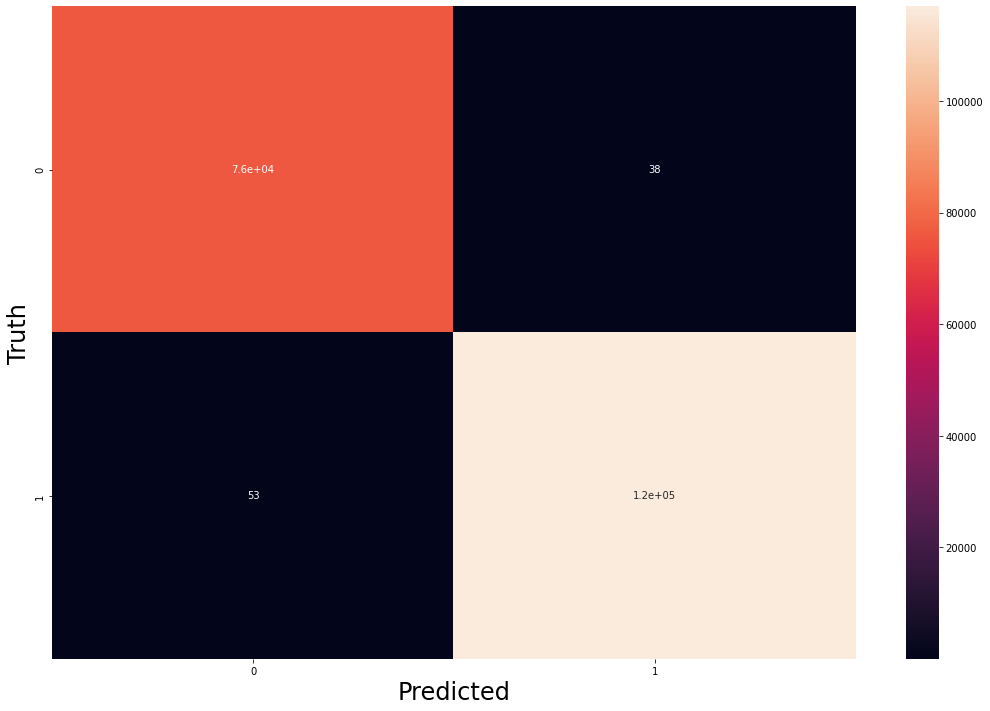

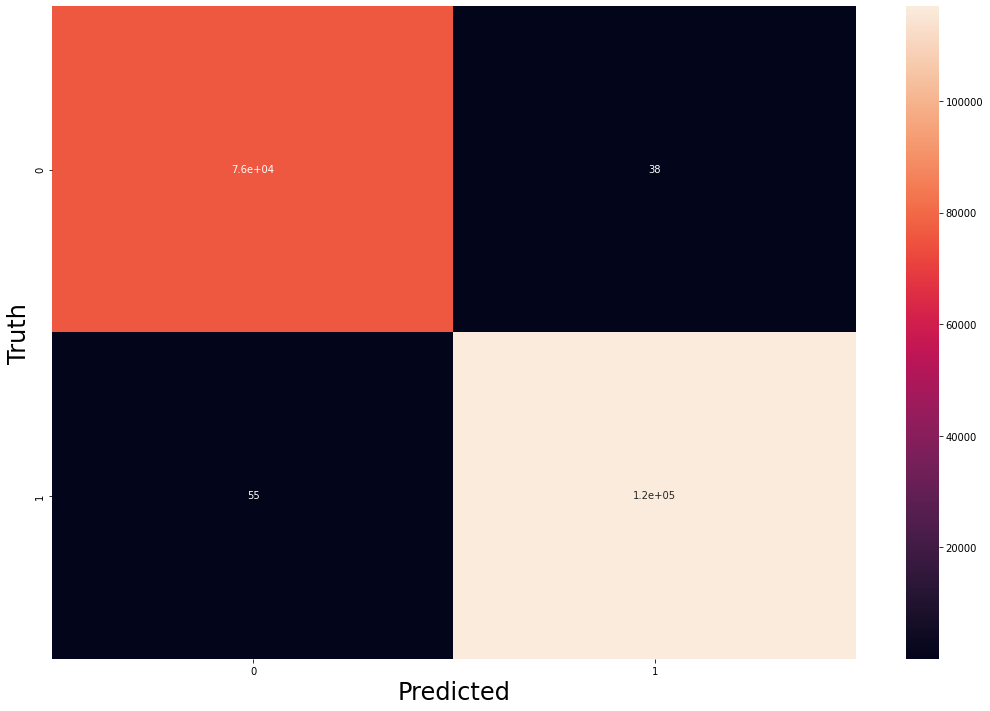

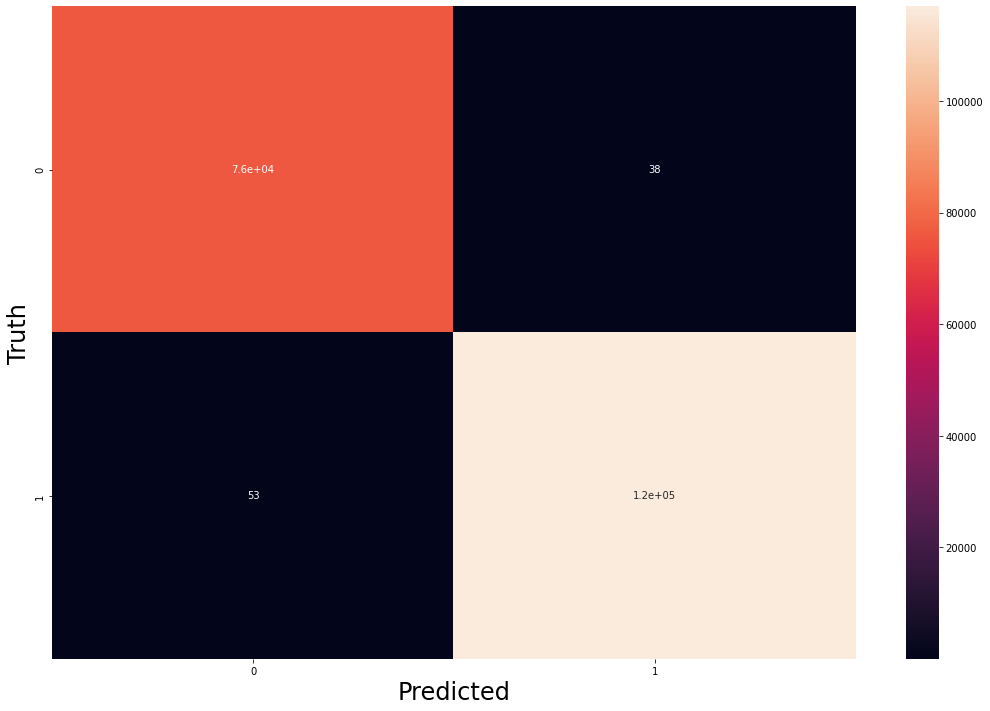

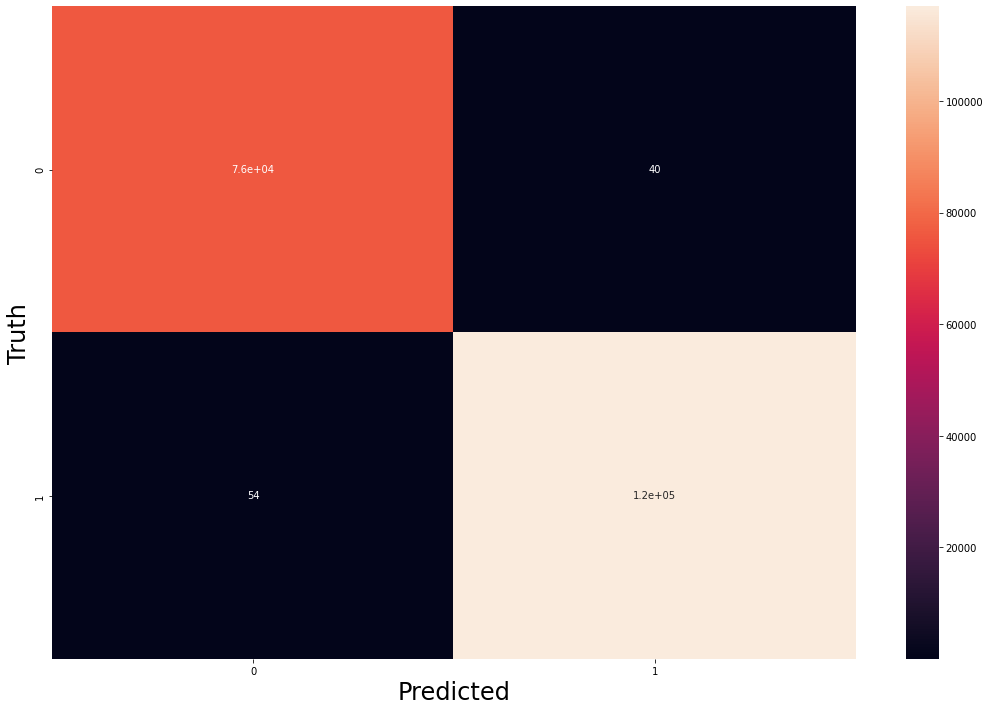

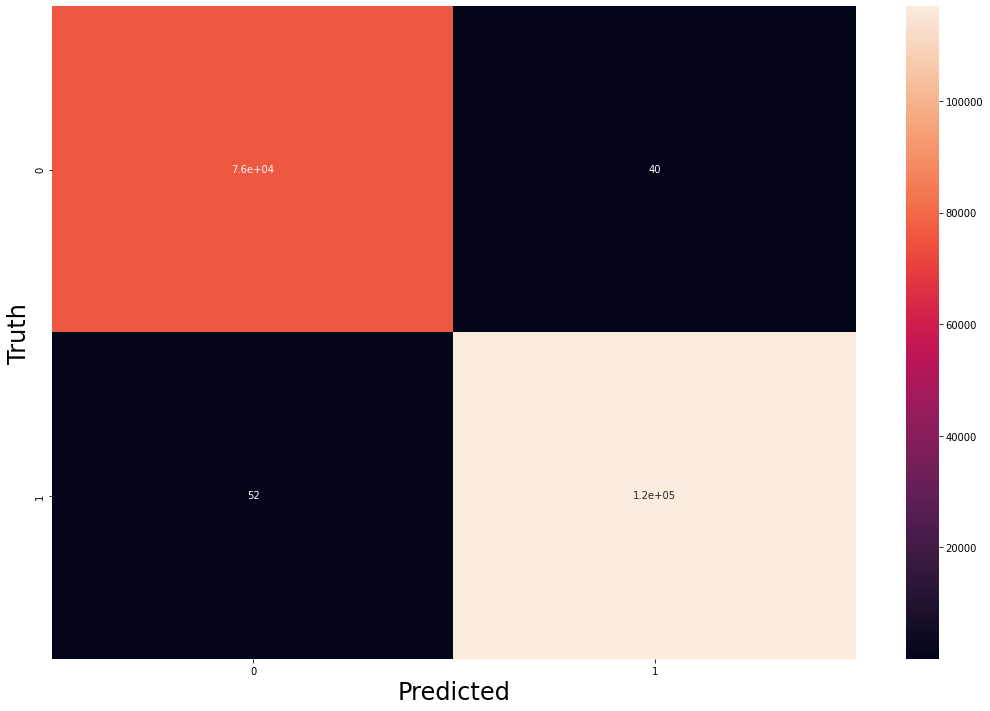

In [ ]:
n=[100,200,300,400,500]
for it in range(len(n)):
    rt_model = RandomForestClassifier(n_estimators=n[it])
    rt_model.fit(x_train,y_train)
    get_score(rt_model,x_test,y_test)
    evaluate_model(rt_model,x_test,y_test)

#### SVM

In [ ]:
svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [ ]:
import pickle

filename = 'svm2_model.sav'
pickle.dump(svm_model, open(filename,'wb'))


#svm2_model = pickle.load(open(filename,'rb'))

              precision    recall  f1-score   support

           0       0.63      0.98      0.77     76343
           1       0.98      0.63      0.77    116961

    accuracy                           0.77    193304
   macro avg       0.81      0.80      0.77    193304
weighted avg       0.84      0.77      0.77    193304

False positive rate FPR: 0.36796011856642413
False negative rate FNR: 0.017263118360339093
FAR: 0.19261161846338162
Accuracy: 0.767294003228076


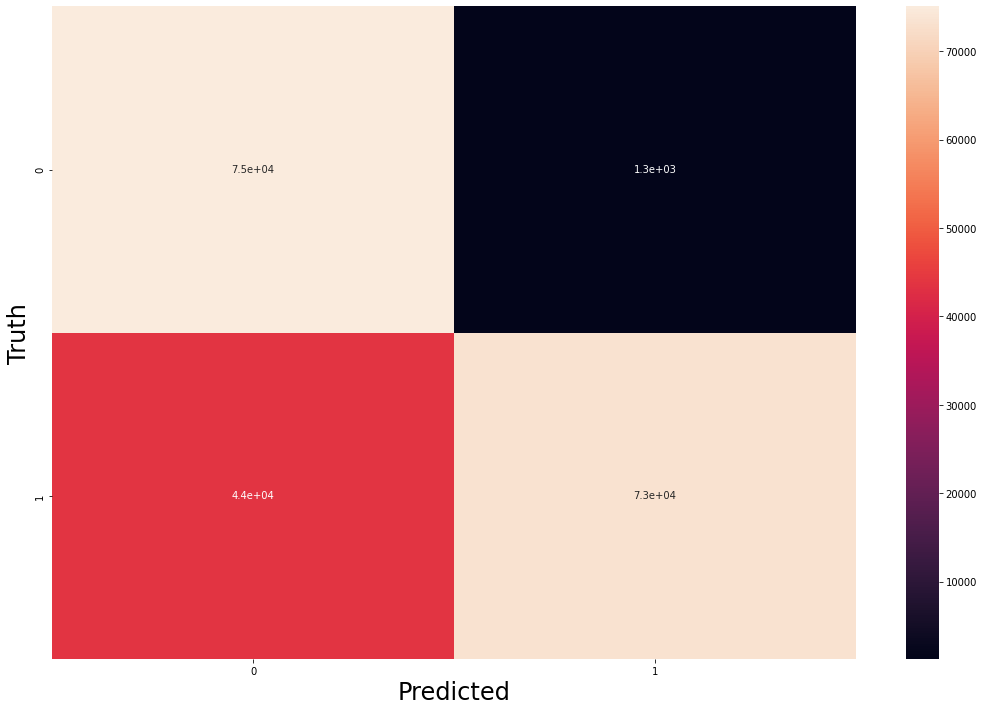

In [ ]:
#get_score(svm_model,x_test,y_test)
evaluate_model(svm_model,x_test,y_test)

#### AdaBoost 

AdaBoostClassifier(n_estimators=500)
score: 0.999280925381782
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76511
           1       1.00      1.00      1.00    116793

    accuracy                           1.00    193304
   macro avg       1.00      1.00      1.00    193304
weighted avg       1.00      1.00      1.00    193304

False positive rate FPR: 0.0007843957538043194
False negative rate FNR: 0.0006763003800979351
FAR: 0.0007303480669511273
Accuracy: 0.999280925381782


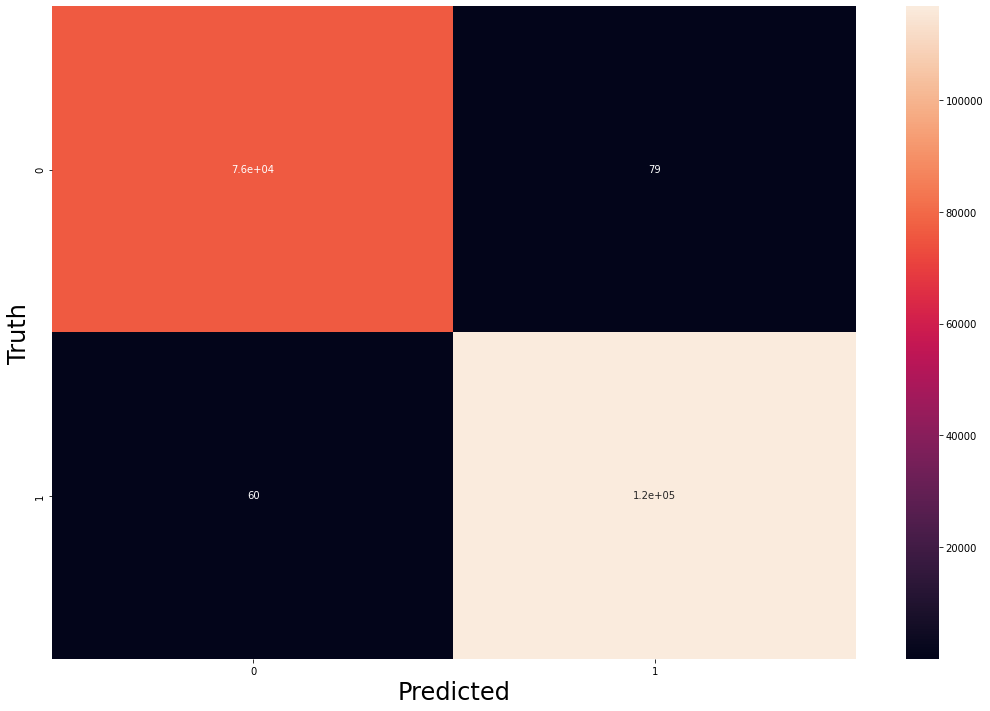

In [28]:
ab_model = AdaBoostClassifier(n_estimators=500)
ab_model.fit(x_train,y_train)
get_score(ab_model,x_test,y_test)
evaluate_model(ab_model,x_test,y_test)

#### Linear Discriminant

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
score: 0.9706369242229855
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     76316
           1       0.96      1.00      0.98    116988

    accuracy                           0.97    193304
   macro avg       0.98      0.96      0.97    193304
weighted avg       0.97      0.97      0.97    193304

False positive rate FPR: 0.0057789718187669665
False negative rate FNR: 0.04319670381982633
FAR: 0.024487837819296646
Accuracy: 0.9706369242229855


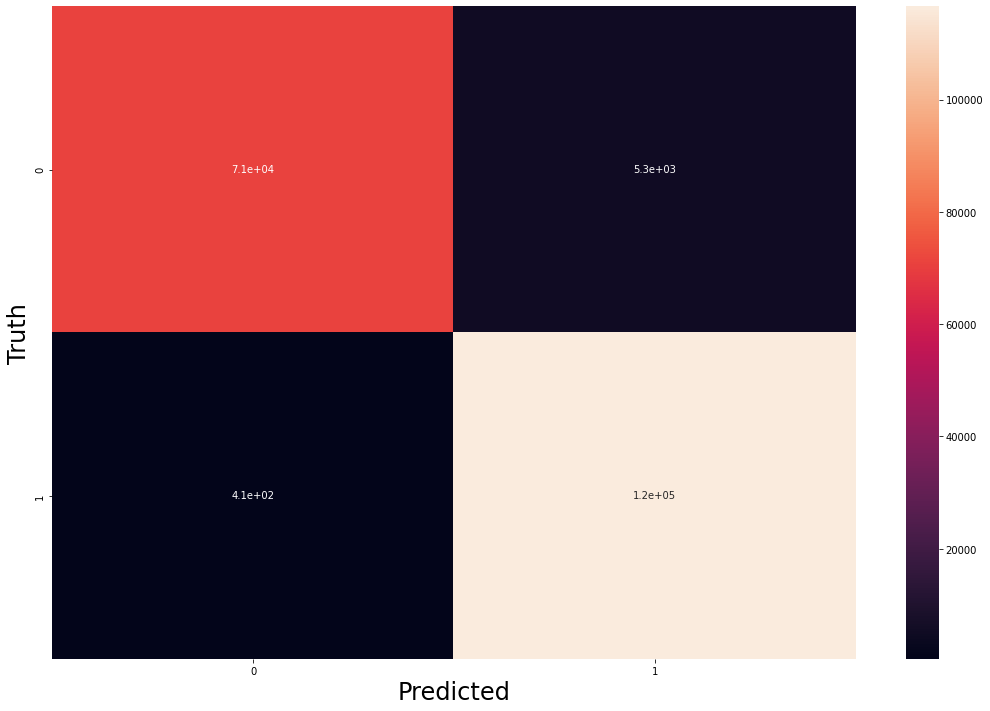

In [ ]:
ld_model = LinearDiscriminantAnalysis()
ld_model.fit(x_train,y_train)
get_score(ld_model,x_test,y_test)
evaluate_model(ld_model,x_test,y_test)

#### KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
score: 0.9958717874436122
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     76316
           1       1.00      1.00      1.00    116988

    accuracy                           1.00    193304
   macro avg       1.00      1.00      1.00    193304
weighted avg       1.00      1.00      1.00    193304

False positive rate FPR: 0.004903889020008916
False negative rate FNR: 0.0036227550026487125
FAR: 0.004263322011328815
Accuracy: 0.9958717874436122
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
score: 0.9955303563299259
              precision    recall  f1-score   support

           0       0.99      0.99      0.99 

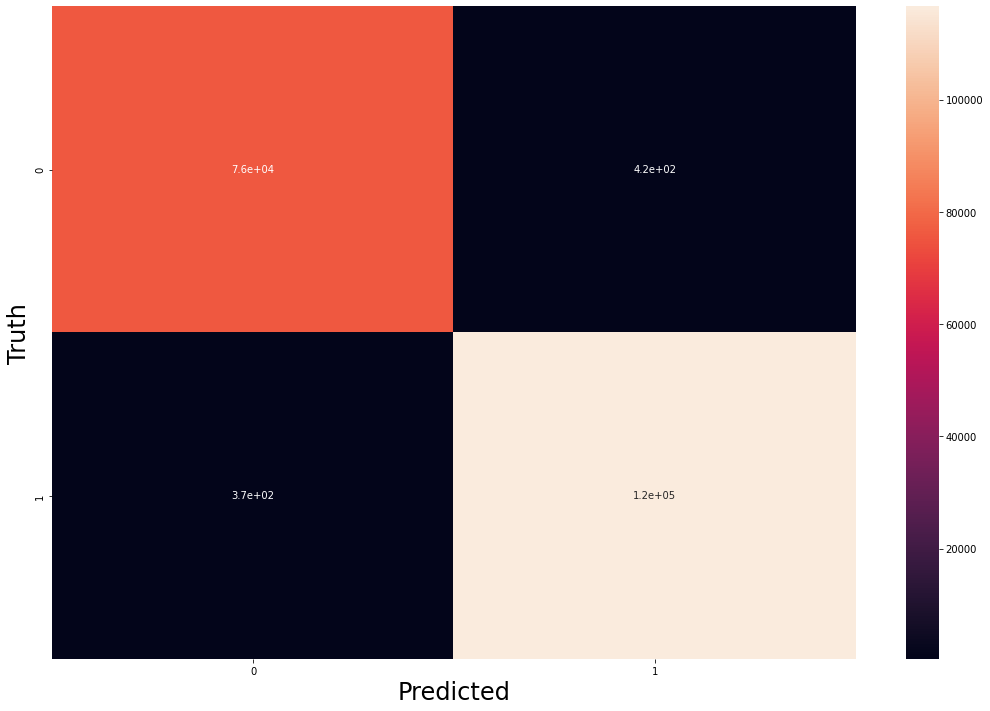

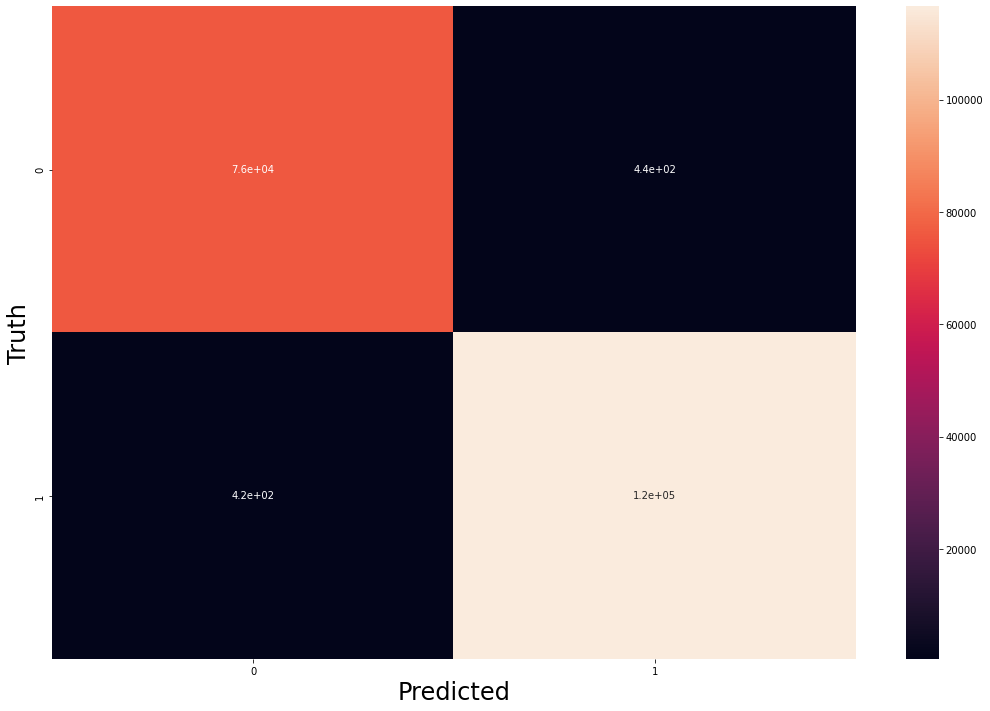

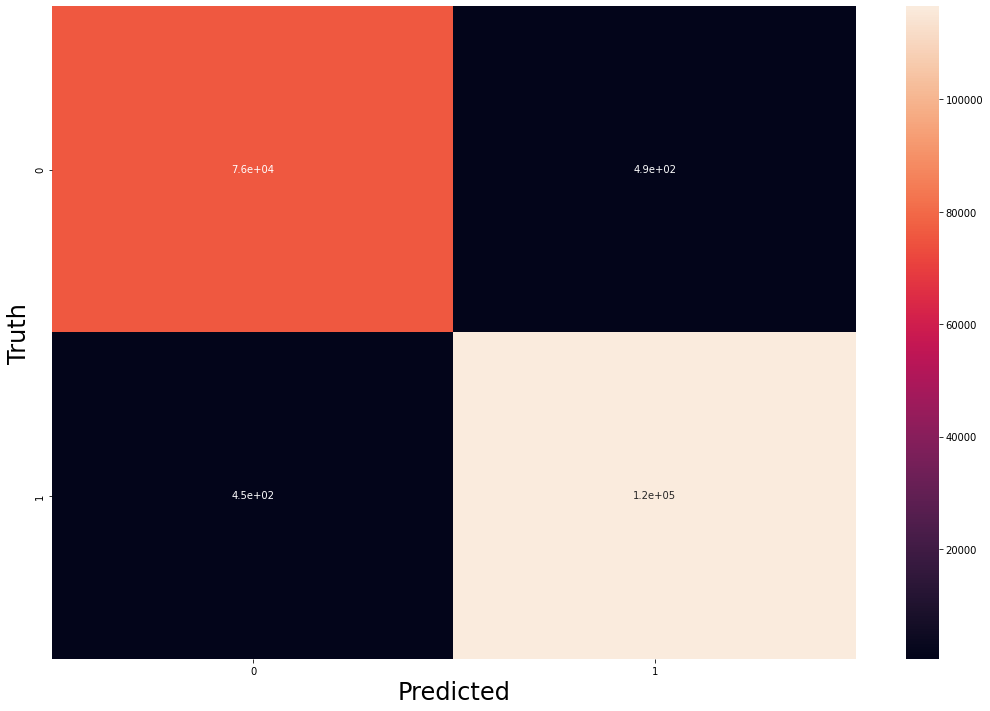

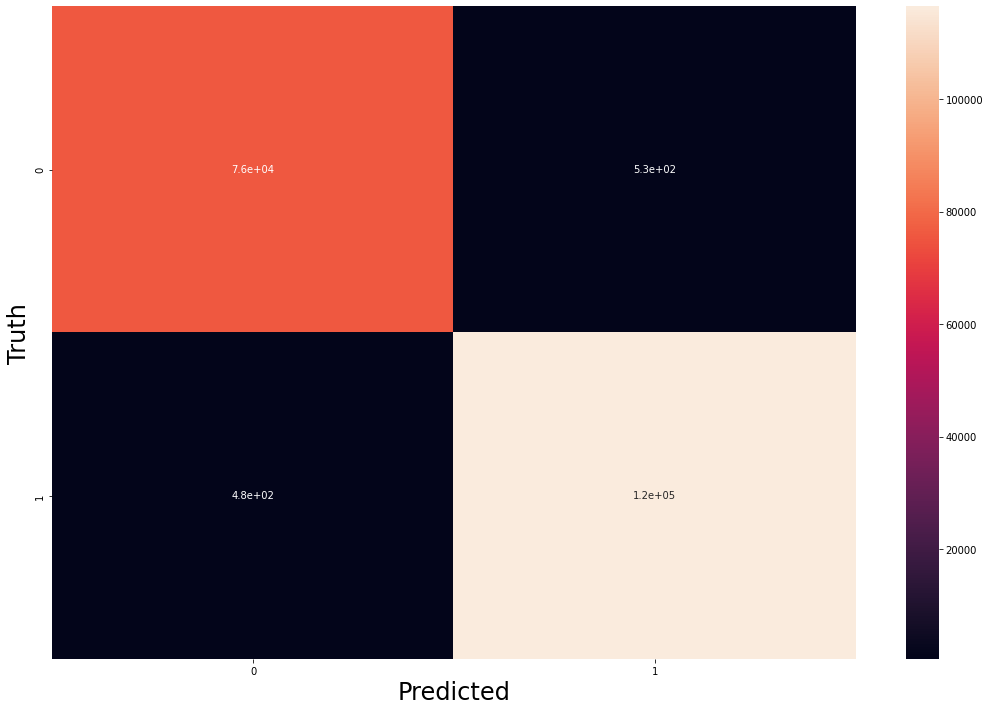

In [ ]:
n=[3,5,7,9]
for i in range(len(n)):  
  KNN_model = KNeighborsClassifier(n_neighbors=n[i])
  KNN_model.fit(x_train, y_train)
  get_score(KNN_model,x_test,y_test)
  evaluate_model(KNN_model,x_test,y_test)

#### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
score: 0.9678071845383438
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     76316
           1       0.96      0.98      0.97    116988

    accuracy                           0.97    193304
   macro avg       0.97      0.96      0.97    193304
weighted avg       0.97      0.97      0.97    193304

False positive rate FPR: 0.027668836507230555
False negative rate FNR: 0.03501112463792452
FAR: 0.03133998057257754
Accuracy: 0.9678071845383438


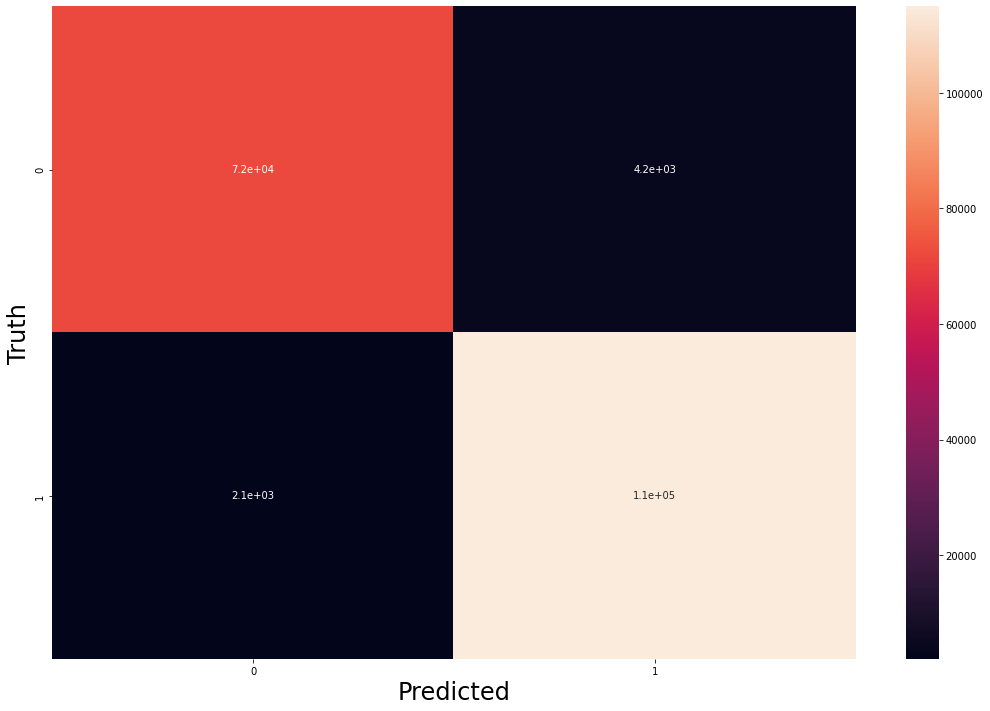

In [ ]:
lr_model = LogisticRegression(max_iter=1000000)
lr_model.fit(x_train,y_train)
get_score(lr_model,x_test,y_test)
evaluate_model(lr_model,x_test,y_test)

#### Cross Validation

In [ ]:
model = RandomForestClassifier(n_estimators=400)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9996 (+/- 0.00)
[0.99961977 0.99954217 0.99963529 0.99953441 0.99964305]


In [ ]:
model = RandomForestClassifier(n_estimators=500)
scores=cross_val_score(model, input, target, cv=5)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.9996 (+/- 0.00)
[0.99964305 0.99954217 0.99963529 0.99954217 0.99961977]


## Retrieve Model